In [ ]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.vision import *

# Dogs and cats

## Resnet 34

In [ ]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/ubuntu/.fastai/data/dogscats')

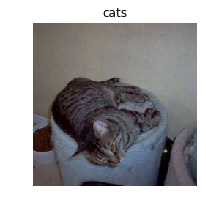

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
img,label = data.valid_ds[-1]
img.show(title=data.classes[label])

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

Total time: 03:24
epoch  train loss  valid loss  accuracy
0      0.051807    0.019401    0.993000  (03:24)



In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 06:40
epoch  train loss  valid loss  accuracy
0      0.045248    0.031617    0.986000  (01:05)
1      0.031750    0.021102    0.992000  (01:06)
2      0.016185    0.021817    0.993000  (01:06)
3      0.015322    0.023137    0.991500  (01:07)
4      0.009295    0.021500    0.994000  (01:07)
5      0.008227    0.020382    0.994000  (01:07)



In [ ]:
accuracy(*learn.TTA())

Total time: 00:33



tensor(0.9965)

## rn50

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(6)

Total time: 09:24
epoch  train loss  valid loss  accuracy
0      0.054099    0.024692    0.992500  (01:36)
1      0.039004    0.025797    0.991500  (01:33)
2      0.040528    0.021088    0.992000  (01:33)
3      0.026295    0.022694    0.993000  (01:33)
4      0.019064    0.016771    0.994000  (01:33)
5      0.016541    0.015919    0.995500  (01:33)



In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 12:42
epoch  train loss  valid loss  accuracy
0      0.031718    0.019076    0.991000  (02:07)
1      0.031773    0.025698    0.991000  (02:07)
2      0.014313    0.032038    0.990500  (02:06)
3      0.009425    0.024969    0.991500  (02:06)
4      0.006091    0.016411    0.995500  (02:06)
5      0.004848    0.016143    0.995500  (02:07)



In [ ]:
accuracy(*learn.TTA())

Total time: 00:45



tensor(0.9965)